In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt')
flavors = whisky.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors)
corr_whisky = pd.DataFrame.corr(flavors.transpose())
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=0,
                     svd_method='randomized')

draw the clusters as groups that we just
discovered in our whisky DataFrame.
Let's also rename the indices to match the sorting.
We also specify their index explicitly.
These are first lines of code.
We then reorder the rows in increasing order by group labels.

In [12]:
whisky['Group']=pd.Series(model.row_labels_,index=whisky.index)
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,2
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,4
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,5
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,3
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands,5
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands,4
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside,1
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside,4


In [13]:
#reorder the rows in increasing order by group labels
#these are the group labes that have been discovered using 
#spectral co-clustering
whisky = whisky.loc[np.argsort(model.row_labels_)]
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
39,40,GlenScotia,2,2,2,2,0,1,0,1,2,2,1,1,PA28 6DS,172090,621010,Campbelltown,0
55,56,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,PA60 7XT,152660,667040,Islands,0
68,69,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,KW1 5BA,336730,950130,Highlands,0
19,20,Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,PA49 7UN,126680,661400,Islay,0
66,67,Oban,2,2,2,2,0,0,2,0,2,2,2,0,PA34 5NH,185940,730190,Highlands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,50,Glenlossie,1,2,1,0,0,1,2,0,1,2,2,2,IV30 3SS,322640,861040,Speyside,5
50,51,Glenmorangie,2,2,1,1,0,1,2,0,2,1,2,2,IV19 1PZ,276750,883450,Highlands,5
20,21,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,PA46 7RR,142210,673170,Islay,5
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands,5


In [15]:
#we reset the index
whisky= whisky.reset_index(drop=True)
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,40,GlenScotia,2,2,2,2,0,1,0,1,2,2,1,1,PA28 6DS,172090,621010,Campbelltown,0
1,56,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,PA60 7XT,152660,667040,Islands,0
2,69,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,KW1 5BA,336730,950130,Highlands,0
3,20,Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,PA49 7UN,126680,661400,Islay,0
4,67,Oban,2,2,2,2,0,0,2,0,2,2,2,0,PA34 5NH,185940,730190,Highlands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,50,Glenlossie,1,2,1,0,0,1,2,0,1,2,2,2,IV30 3SS,322640,861040,Speyside,5
82,51,Glenmorangie,2,2,1,1,0,1,2,0,2,1,2,2,IV19 1PZ,276750,883450,Highlands,5
83,21,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,PA46 7RR,142210,673170,Islay,5
84,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands,5


We have now reshuffled the rows and columns of the table.
So let's also recalculate the correlation matrix.

In [18]:
correlations=pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.705024,0.519615,0.291111,0.553399,-4.029166e-17,2.696799e-01,0.172935,0.367423,0.359211,...,1.343055e-17,0.362915,0.350823,0.434813,0.625172,0.046625,0.250000,0.250000,0.032616,0.387298
1,0.705024,1.000000,0.563602,0.536783,0.685994,-1.968183e-01,-2.193817e-01,0.164128,0.000000,0.019481,...,6.560610e-02,0.196818,0.332956,0.557370,0.529761,0.101144,0.542326,0.054233,-0.035377,0.420084
2,0.519615,0.563602,1.000000,0.302532,0.547723,6.984303e-02,-2.335497e-01,0.224649,0.141421,0.311086,...,6.984303e-02,0.209529,0.151911,0.410792,0.609091,0.161515,0.346410,0.346410,0.225973,0.447214
3,0.291111,0.536783,0.302532,1.000000,0.368230,-2.465135e-01,-4.317878e-01,0.163616,0.000000,0.073199,...,2.465135e-01,0.316946,0.408514,0.230144,0.284366,0.461486,0.465778,0.465778,0.436770,0.676481
4,0.553399,0.685994,0.547723,0.368230,1.000000,3.825460e-01,-6.509259e-17,0.341793,0.193649,0.283981,...,-1.912730e-01,0.382546,0.277350,0.812500,0.679582,0.368605,0.553399,0.079057,0.103142,0.306186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.046625,0.101144,0.161515,0.461486,0.368605,6.204367e-01,6.286946e-02,0.745840,0.571040,0.720176,...,6.204367e-01,0.846050,0.776968,0.589768,0.674066,1.000000,0.746004,0.746004,0.790789,0.722315
82,0.250000,0.542326,0.346410,0.465778,0.553399,4.838867e-01,-1.348400e-01,0.691740,0.367423,0.466974,...,4.838867e-01,0.725830,0.613941,0.790569,0.742391,0.746004,1.000000,0.550000,0.619712,0.580948
83,0.250000,0.054233,0.346410,0.465778,0.079057,3.629150e-01,1.348400e-01,0.562039,0.612372,0.790263,...,6.048584e-01,0.725830,0.613941,0.316228,0.625172,0.746004,0.550000,1.000000,0.815410,0.774597
84,0.032616,-0.035377,0.225973,0.436770,0.103142,4.340227e-01,-2.198997e-01,0.437140,0.399468,0.644389,...,5.129359e-01,0.828589,0.543523,0.335212,0.548004,0.790789,0.619712,0.815410,1.000000,0.631614


In [20]:
#converting to a numpy array
correlations=np.array(correlations)
correlations

array([[ 1.        ,  0.70502399,  0.51961524, ...,  0.25      ,
         0.0326164 ,  0.38729833],
       [ 0.70502399,  1.        ,  0.56360186, ...,  0.05423261,
        -0.03537746,  0.42008403],
       [ 0.51961524,  0.56360186,  1.        , ...,  0.34641016,
         0.22597307,  0.4472136 ],
       ...,
       [ 0.25      ,  0.05423261,  0.34641016, ...,  1.        ,
         0.81541009,  0.77459667],
       [ 0.0326164 , -0.03537746,  0.22597307, ...,  0.81541009,
         1.        ,  0.63161394],
       [ 0.38729833,  0.42008403,  0.4472136 , ...,  0.77459667,
         0.63161394,  1.        ]])

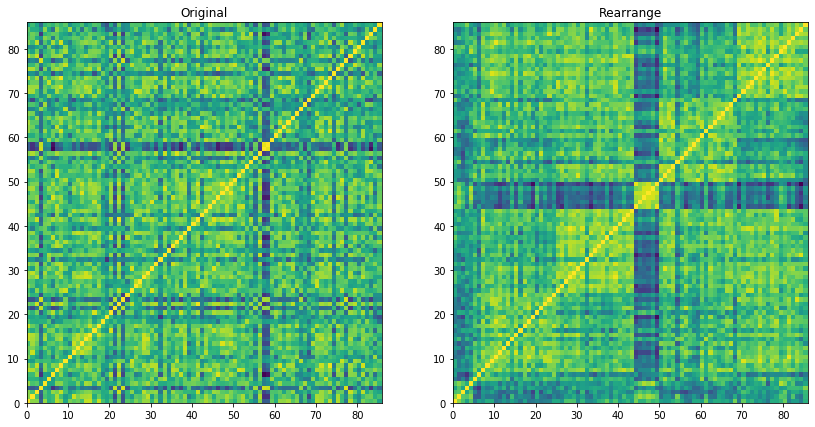

In [23]:
#Plot the original correlation coefficients
#and the rearranged correlation coeficients
#expect to form clusters

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')
plt.subplot(122)
plt.pcolor(correlations)
plt.title('Rearrange')
plt.axis('tight')
plt.savefig('correlations.pdf')
plt.show()

If you follow the diagonal line on the right from the bottom-left corner
to the top-right corner, you'll be able to see visually
those six blocks of whiskies.
Based on this, we would expect whiskies that
belong to the same block to be similar in their flavor
in terms of their smokiness, in terms of their honey flavor, and so on.

the code below will return 1 because: data.loc alters the order of appearance, but leaves the indices the same.

In [28]:
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data[0]

1

the code below will return 4 because:  The 0th index of the data has been reordered to index 3 of the original, which is 4.

In [29]:
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data[0]

4